# Clustering
The aim of clustering is to auomatically find groups of similar datapoints in unlabeled data. In this exercise your aim will be to implement the k-Means algorithm and apply it to a set of random data. 

<AxesSubplot:>

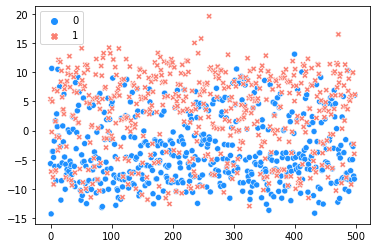

In [30]:
import seaborn as sns #for plotting
from sklearn.datasets import make_blobs #data generator

# automatically generate a random dataset with underlying clusters. You can play around with the parameters of this generator function to test your algorithm.
features, true_labels = make_blobs(
    n_samples= 500,
    centers= 4,
    cluster_std= 2.75,
    random_state= 42
)
# visualize the data

sns.scatterplot(data=features, palette=["dodgerblue", "salmon"])

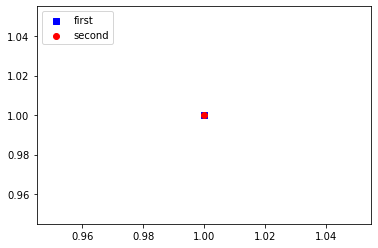

In [61]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# k mean algorithm

# ====================================================================
# Randomly initialize k centroids
# repeat:
#   expectation: Assign each point to it's closet centroid
#   maximization: Compute the new centroid (mean) of each cluster
# until the centroid do not change
# ====================================================================

# define centers (random position)
centroids, centroid_labels = make_blobs(
    n_samples= 2,
    centers= 2,
    cluster_std= 2.75,
    random_state= 42
)

# Append them into the NumPy array
# features = np.append(features, centroids)
features = np.asarray(features)
centroids = np.asarray(centroids)

copy_of_centroids = centroids

i = 0

while i < 10 :

# nearest point
    distance, index = sp.spatial.KDTree(centroids).query(features[i])
    
    # index is the nearest centroid

    features[i]

    

    



    i += 1

    #if(i == features.size) :
    #    i = 0
    #    continue


x = range(100)
y = range(100,200)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(features[:].all(),features[:].all(), c='b', marker="s", label='first', data=features)
ax.scatter(centroids[:].all(), centroids[:].all(), c='r', marker="o", label='second', data=centroids)
plt.legend(loc='upper left')
plt.show()

In [55]:
# visualize your results


array([[-3.1531194,  8.3704095]])

C:\Users\SaschaButhelezi\anaconda3\envs\uk259\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


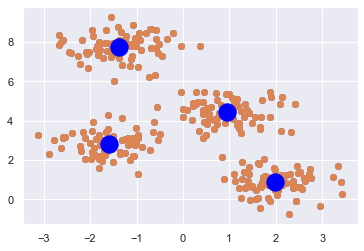

In [90]:
# Internet Version / k-means ++
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs # data generator import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.pause

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue')
plt.show()

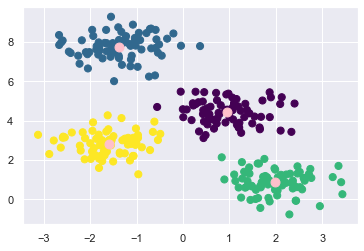

In [106]:
# Another test

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
        for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], s=80, c='pink')
plt.show()

In [212]:
# K-means is limited to linear cluster bounderies
from sklearn.datasets import make_moons
import plotly.express as px
from plotly.offline import plot

#Animation stuff

X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
#scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

template = px.data.gapminder()
print(template)

df = pd.DataFrame(data=X)
df.index.name = "time"
df.reset_index(inplace=True)
print(df)

animation = px.scatter(df, x=0, y=1, animation_frame="time", animation_group=labels, color=labels, range_x=[-1.5,2], range_y=[-1,1])
plot(animation)

C:\Users\SaschaButhelezi\anaconda3\envs\uk259\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



          country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  

'temp-plot.html'

C:\Users\SaschaButhelezi\anaconda3\envs\uk259\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


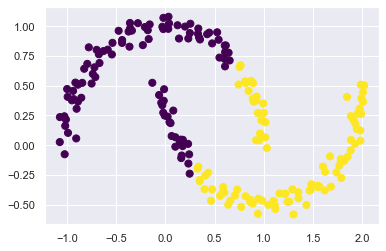

In [124]:
# K-means is limited to linear cluster bounderies
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

C:\Users\SaschaButhelezi\anaconda3\envs\uk259\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\SaschaButhelezi\anaconda3\envs\uk259\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


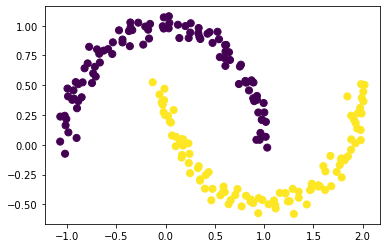

In [66]:
# Getting around the previous issue -> Kernelized k-means
from sklearn.cluster import SpectralClustering

# More complicated non-linear boundaries
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# PCA

Goal is not to predict the y and x values, but rather the unsupervised learning problem attempts to learn about the relationship between the x and y values.


Very good for 

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

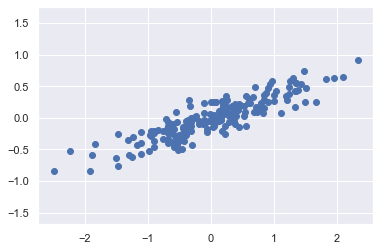

In [1]:
# PCA exampleF
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# There is nearly a linear shape
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

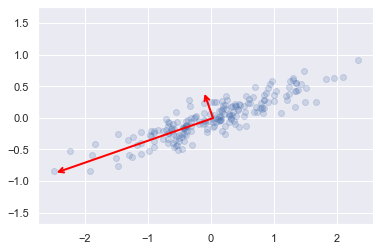

In [2]:
# Another representation with vector : 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='red')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

> These vector arrows represent the *principle axes* of the data set.
The length is an indication of how "important" the axis is in describing the distribution of the data. 

More Precisely, it is a measure of variance of the data when projected onto that of the axis.

In [74]:
# When using it for recuding the dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape) # Reduced to only a single dimension

original shape:    (200, 2)
transformed shape: (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389315,
 1.0060642308539953)

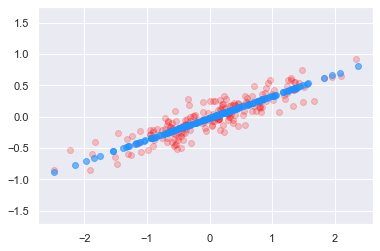

In [80]:
# To get a better picture let's reverse the entire thing and plot the PCA version and the original version

# All points get pulled to the new axis and the machine still has a good idea of where the cluser is located.
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color="red")
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.6,  color="dodgerblue")
plt.axis('equal')

# PCA with Noises

### We will be having a set of digits as data and then adding noise to them. Afterwards we will use PCA and one of it's benefis by removing unecessary noise up to 50 %.

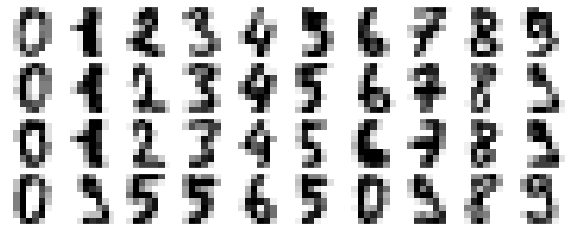

In [82]:
# Simple digits with some noise but still readable
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

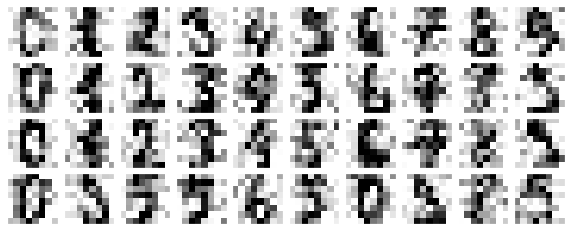

In [83]:
# Next we will make it almos unreadable by adding even more noise to the digits
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

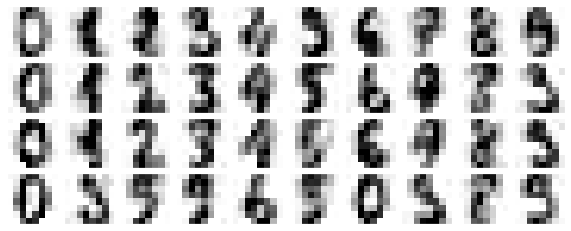

In [119]:
# Last step will be cleaning up the digits and removing the noise by using the PCA 
# unsupervised problem solving and finding where the pixels have the least variance. 
# Those are the ones we then want to save.

# We are removing 50% of the noise by viewing one set of the digits and then checking each pixels value and comparing them to each other. 
# If there is no big variance, we then keep that value, otherwise we remove the unecessary pixel value
pca = PCA(0.5).fit(noisy)
pca.n_components_

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)